In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/home/nbuser/library/gapminder.csv")

In [7]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [8]:
df = df.drop(["Region"],1)

In [13]:
X = df.iloc[:,[1,2,3,4,5,6,7,8]].values

In [14]:
X

array([[2.73000000e+00, 1.00000000e-01, 3.32894466e+00, ...,
        1.29904900e+02, 7.53000000e+01, 2.95000000e+01],
       [6.43000000e+00, 2.00000000e+00, 1.47435339e+00, ...,
        1.30124700e+02, 5.83000000e+01, 1.92000000e+02],
       [2.24000000e+00, 5.00000000e-01, 4.78516998e+00, ...,
        1.18891500e+02, 7.55000000e+01, 1.54000000e+01],
       ...,
       [1.86000000e+00, 4.00000000e-01, 1.47934658e+00, ...,
        1.21936700e+02, 7.54000000e+01, 2.62000000e+01],
       [5.88000000e+00, 1.36000000e+01, 1.48981514e-01, ...,
        1.32449300e+02, 5.20000000e+01, 9.49000000e+01],
       [3.85000000e+00, 1.51000000e+01, 6.54323190e-01, ...,
        1.31974500e+02, 4.90000000e+01, 9.83000000e+01]])

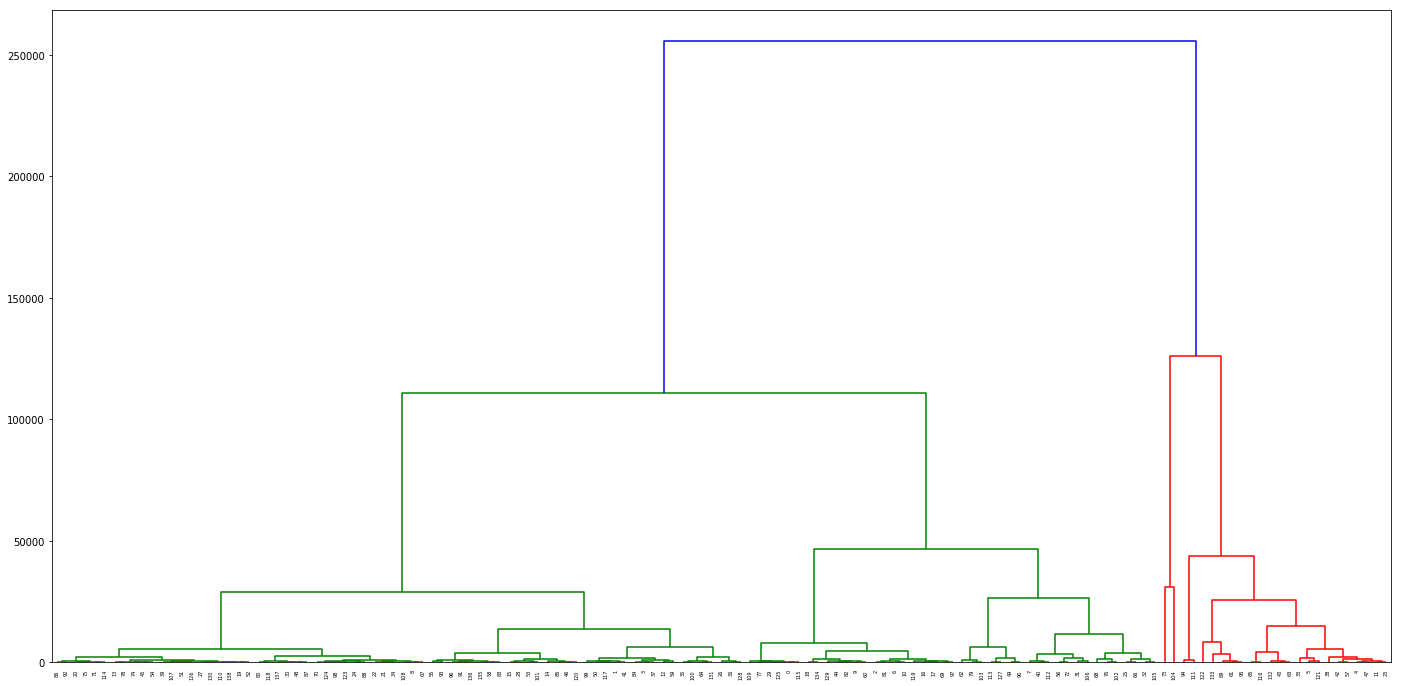

In [17]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(24,12))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering

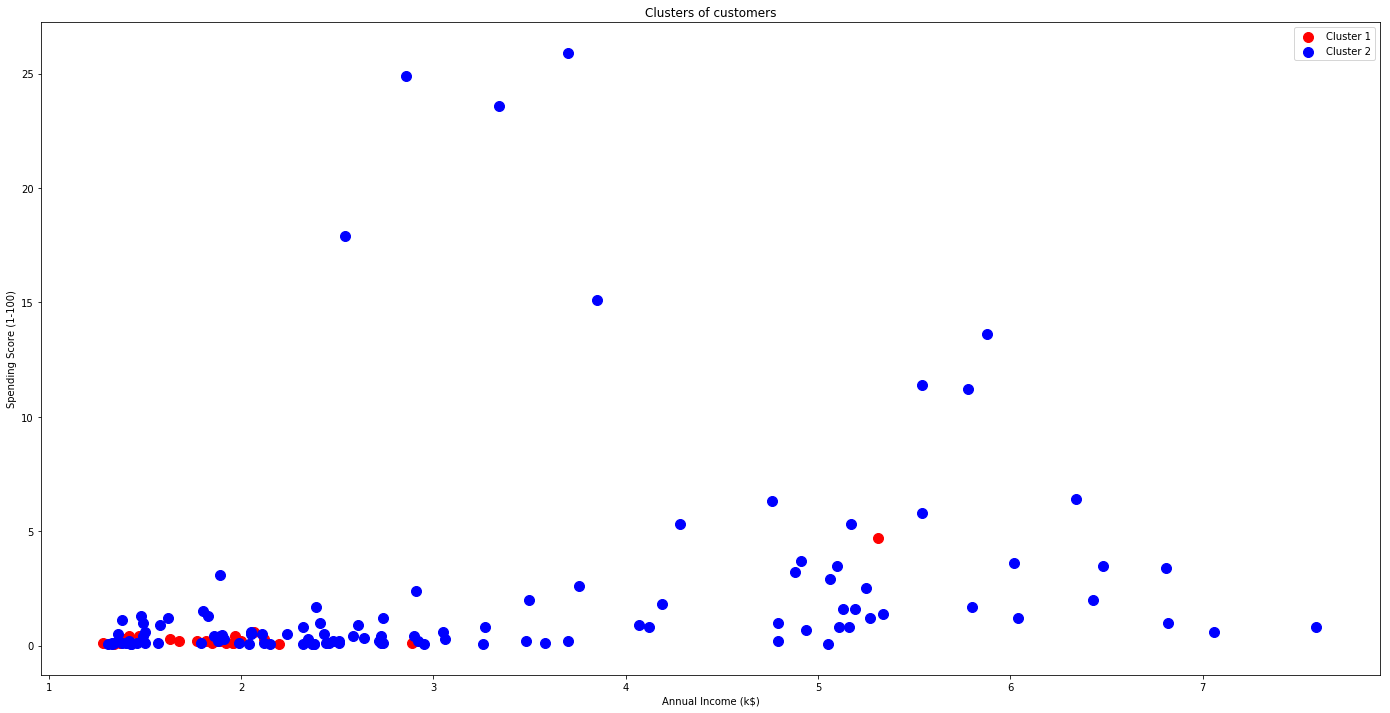

In [20]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(24,12))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

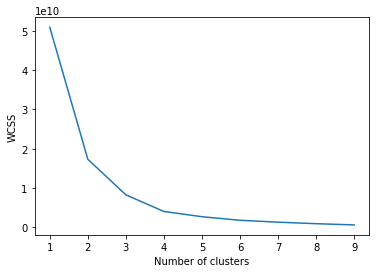

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()